# Pairs Trading with PCA Approach--Paper Replication


## References
- Advanced Pairs Trading: The Principal Component Analysis (PCA) Approach. https://docs.google.com/presentation/d/18zzKkUS_YKczjl6EoaDUmHAQ7isHz0F_I_6lcc_u_rA/edit#slide=id.gb9c45b0df4_0_90
- Applying Research: PCA and Pairs Trading. https://www.quantconnect.com/docs/v2/research-environment/applying-research/pca-and-pairs-trading
- Statistical Arbitrage in the U.S. Equities Market(2008) https://math.nyu.edu/~avellane/AvellanedaLeeStatArb071108.pdf
- Stochastic Processes Simulation — The Ornstein Uhlenbeck Process. https://towardsdatascience.com/stochastic-processes-simulation-the-ornstein-uhlenbeck-process-e8bff820f3
- ETF Screener. https://finance.yahoo.com/etfs/?count=25&offset=0
- Pandas数据合并与拼接的5种方法.https://cloud.tencent.com/developer/article/1640799
- Explained: PCA, Eigenvectors and Eigenvalues. https://medium.com/@aruneema98/explained-pca-eigenvectors-and-eigenvalues-ad34524eaaab
- 🌟 Ornstein-Uhlenbeck process and applications.https://nbviewer.org/github/cantaro86/Financial-Models-Numerical-Methods/blob/master/6.1%20Ornstein-Uhlenbeck%20process%20and%20applications.ipynb 
- 🌟 Simple question about Ornstein-Uhlenbeck process. https://stats.stackexchange.com/questions/210437/simple-question-about-ornstein-uhlenbeck-process

## 1. Stock Returns Decomposition

### Idiosyncratic Components

#### Returns of Stocks

- Formula: $R_i=\beta_i*R_{mkt}+\tilde{R_i}$
  - $R_i$: uncorrelated idiosyncratic componenet
  - Remaining: returns related to systematic componenet
  - $i$: stock index
- Rewrite for multi-factor: $R_i=\sum_{j=1}^m \beta_{i,j}R_{mkt_j}+\tilde{R_i}$
  - $j$: factor index, assume has $m$ factors
- Then the idiosyncratic components can be rewritten as: $\tilde{R_i}=R_i-\sum_{j=1}^m \beta_{i,j}R_{mkt_j}$

#### Market-neutral Portfolio
- Formula: $\bar{\beta_j}=\sum_{i=1}^N\beta_{ij}Q_i=0$
  - Notation
    - $Q_i$: i=1,2,3,...N, amounts invested in each stock
  - Intuition: market neutral portfolio vanishes portfolio betas in average level.As concequences, the portfolio returns are <u>only affected by idiosyncratic componenent</u>.
    - Mathmatical expression: $\sum_{i=1}^NQ_iR_i=\sum_{i=1}^NQ_i\tilde{R_i}$


## 2. PCA Approach

### Stock Return Matrix
- General idea: use historical share price data on <u>cross-section</u> of $N$ stock in $M$ trading days.
- Formula: $R_{ik}=\frac{S_{i(t_0-(k-1)\Delta t)}-S_{i(t_0-k\Delta t)}}{S_{i(t_0-k\Delta t)}}$, for $k=1,2,...,M$ and $i=1,2,...,N$
  - $t_0$: given date, going back $M+1$ days as a matrix
  - $S_{it}$: price of stock $i$ at time $t$
  - $\Delta t=1/252$: daily observations
  - $k$: time index

### Return Standardization
- Formula: $Y_{ik}=\frac{R_{ik}-\bar{R_i}}{\bar{\sigma_i}}$
  - $\bar{R_{i}}=\frac{1}{M}\sum_{k=1}^MR_{ik}$
  - $\bar{\sigma}_i^2=\frac{1}{M-1}\sum_{k=1}^M(R_{ik}-\bar{R_i})^2$

### Correlation Matrix Eigenvectors特征向量
- Correlation matrix: $\rho_{ij}=\frac{1}{M-1}\sum_{k=1}^MY_{ik}Y_{jk}$
- `Eigenvalues` ranking list: $N≥\lambda_1>\lambda_2≥\lambda_3≥...≥\lambda_N≥0$
  - amount of variance along each eigenvector
  - it means **first** eigenvector accounts for **the largest spread** among data, the second eigenvector accounts for the second largest spread among data...
- Corresponding `eigenvectors`: $v^{(j)}=(v_1^{j},...,v_N^{j})$, for $j=1,2,...,N$
  - represent the *directions* of maximum variance
  - in the same eigenvector curve, the nearby coefficients belonging to firms in the same industry sometime is not so true, because of noise leading incoherence.

### Eigenportfolio Creation
- The Eigenportfolio returns can be:
  - Formula: $F_{jk}=\sum_{i=1}^N\frac{v_i^{(j)}}{\bar{\sigma_i}}R_{ik}=\sum_{i=1}^NQ_i^{(j)}R_{ik}$, where $j=1,2,...m$
    - firms with larger market cap tend to have smaller volatility


## 3. PCA Trading Strategy

### Modeling the Idiosyncratic Componenets with OU Process
- Formula: $d \tilde{X_i}(t)=\alpha_idt+dX_i(t)$
  - $\alpha_i$: drift of idiosyncratic component
  - $\alpha_idt$: the *excess rate of return* of the stock compared with market or sector return as benchmark over a certain period.
    - measures <u>systematic deviations</u> from sector
  - $dX_i(t)$: the <u>increment</u> of a stationary stochastic process which models price fluctuations related with over-reactions or idiosyncratic changes of stock price which <u>irrelevant to industry sector</u>.
    - OU Process, lag=1(AR(1)):
      - $dX_i(t)=𝜅_i(m_i-X_i(t))dt+\sigma_idW_i(t)$
        - $𝜅$: speed of mean-reversion. In our trading strategy, stocks with <u>fast mean-reversion</u> are our only interests and reject other stocks.
          - if $𝜅$>>1: stock reverts **quickly** to its mean, the <u>effect of drift</u> can be negligible.
        - $m_i$: mean value
  - assume $\alpha_i$, $𝜎_i$, $𝜅_i$, $m_i$ vary slowly in relation to $dW(t_i)$
  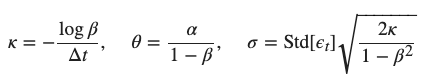

### The S-Score

- Formula: $s_i=\frac{X_i(t)-m_i}{\sigma_{eq,i}}$
  - $\sigma_{eq,i}=\frac{\sigma_i}{\sqrt[2]{2\kappa_i}}$, the equilibrium variance
- Intuition: 
  - s-score measures how far away a given stock or eigenportfolio is from the <u>theoretical equilibrium value</u> associated with the model.
  - means the distance to equilibrium of cointegrated residual in unit std.
- Useful cases: only when **eigenportfolio shows a mean reversion speed($𝜅$) > threshold**, S-score is needed to be calculated.

### Trading Signal Generation Based on Mean Reversion and `S-Score`
- $s_i<-\bar{s_{bo}}$: open a long position
- $s_i<+\bar{s_{bc}}$: close long position
- $s_i<+\bar{s_{so}}$: open a short position
- $s_i>-\bar{s_{sc}}$: close short position
- In original paper, the specific close and open position thresholds' settings based on 2000~2004 ETF factors:
  - $\bar{s_{bo}}=\bar{s_{so}}=1.25$
  - $\bar{s_{bc}}=0.75$
  - $\bar{s_{sc}}=0.50$
- Opening a short position, **selling $1** of corresponding stock and **buying respective beta** values of stocks from scaled eigenvectors.

### Strategy Rationale
- Open trade eigenportfolio:
  - show good mean reversion speed($𝜅$)
  - S-score far from the equilibrum.
- Close trade eigenportfolio:
  - when S-score near 0

### Strategy Application in Detail
- Timing: 
  - Formation period=252 trading days, for correlation matrix estimation. 
  - Trading period=60 trading days, roughly one earnings cycle, for idiosyncratic component estimation.
- Slippage/transcation cost: 5bps
- Numbers of PCA factor: $m$=15 in orginial paper, which explains 55% of total variance.
  - 15 PCA factors method returns > Actual ETF factor > Synthetic ETF factor



In [218]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [219]:
#grasp stocks data in different industries(information techology, Energy, Medicical) from yfinance each industry we use 10 corresponding stocks
stocks=['T','GOOG','META','AAPL','CSCO','DELL','HPQ','LINK','AMZN','CRM',  'BP','BKR','APA','ENB','CNQ','COP','CQP','CTRA','CVX','DVN',  'ALNY','ARGX','BMRN','MMM','ISRG','GMAB','ABT','ALGN','BSX','EW']
ETFs=['XLK','XLE', 'XLV']
startdate='2019-01-01'
enddate='2023-03-31'

In [220]:
dataStock=yf.download(stocks,startdate,enddate,progress=False)['Adj Close']
dataETF=yf.download(ETFs,startdate,enddate,progress=False)['Adj Close']
dataStock.head()

,AAPL,ABT,ALGN,ALNY,AMZN,APA,ARGX,BKR,BMRN,BP,...,ENB,EW,GMAB,GOOG,HPQ,ISRG,LINK,META,MMM,T
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38.047043,64.570129,202.119995,72.760002,76.956497,24.861561,98.849998,18.362785,84.959999,30.331783,...,24.227636,49.746666,15.610000,52.292500,17.993015,155.343338,2.10,135.679993,163.430115,15.495356
2019-01-03,34.257278,61.522789,184.779999,73.209999,75.014000,24.925753,100.970001,18.240656,84.199997,30.504702,...,24.358057,47.886665,15.620000,50.803001,17.382486,150.080002,2.04,131.740005,157.276352,15.516334
2019-01-04,35.719700,63.278748,186.710007,75.199997,78.769501,25.971207,106.000000,19.156614,87.099998,31.463623,...,25.025503,49.573334,16.410000,53.535500,18.071508,157.226669,2.16,137.949997,163.746841,15.914992
2019-01-07,35.640194,64.226364,189.919998,81.779999,81.475502,26.530609,109.550003,19.671295,90.190002,31.565805,...,25.708296,49.913334,17.090000,53.419498,18.272114,159.479996,2.28,138.050003,163.370270,16.203503
2019-01-08,36.319614,63.455257,192.949997,85.339996,82.829002,26.924950,112.660004,20.247042,92.300003,31.463623,...,26.237658,50.869999,17.004999,53.813999,18.498875,160.996674,2.28,142.529999,164.054932,16.408075


In [221]:
#check whether there exists missing values
dataStock.isna().sum()

AAPL    0
ABT     0
ALGN    0
ALNY    0
AMZN    0
APA     0
ARGX    0
BKR     0
BMRN    0
BP      0
BSX     0
CNQ     0
COP     0
CQP     0
CRM     0
CSCO    0
CTRA    0
CVX     0
DELL    0
DVN     0
ENB     0
EW      0
GMAB    0
GOOG    0
HPQ     0
ISRG    0
LINK    0
META    0
MMM     0
T       0
dtype: int64

In [222]:
prices=pd.concat([dataStock,dataETF],ignore_index=False,axis=1)
prices

,AAPL,ABT,ALGN,ALNY,AMZN,APA,ARGX,BKR,BMRN,BP,...,GOOG,HPQ,ISRG,LINK,META,MMM,T,XLE,XLK,XLV
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,38.047043,64.570129,202.119995,72.760002,76.956497,24.861561,98.849998,18.362785,84.959999,30.331783,...,52.292500,17.993015,155.343338,2.100,135.679993,163.430115,15.495356,46.582314,59.279892,79.129684
2019-01-03,34.257278,61.522789,184.779999,73.209999,75.014000,24.925753,100.970001,18.240656,84.199997,30.504702,...,50.803001,17.382486,150.080002,2.040,131.740005,157.276352,15.516334,46.120323,56.288177,77.522942
2019-01-04,35.719700,63.278748,186.710007,75.199997,78.769501,25.971207,106.000000,19.156614,87.099998,31.463623,...,53.535500,18.071508,157.226669,2.160,137.949997,163.746841,15.914992,47.689518,58.782864,79.835533
2019-01-07,35.640194,64.226364,189.919998,81.779999,81.475502,26.530609,109.550003,19.671295,90.190002,31.565805,...,53.419498,18.272114,159.479996,2.280,138.050003,163.370270,16.203503,48.398464,59.308559,80.142014
2019-01-08,36.319614,63.455257,192.949997,85.339996,82.829002,26.924950,112.660004,20.247042,92.300003,31.463623,...,53.813999,18.498875,160.996674,2.280,142.529999,164.054932,16.408075,48.772831,59.805588,80.764267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,160.250000,97.562431,306.700012,189.979996,98.129997,34.287582,360.519989,27.020000,90.739998,35.880001,...,106.059998,27.719999,256.420013,9.100,206.009995,101.139999,18.349760,77.889999,145.960007,127.300003
2023-03-27,158.279999,97.970390,305.950012,190.509995,98.040001,35.151978,361.850006,27.260000,91.500000,36.880001,...,103.059998,27.889999,252.570007,9.100,202.839996,101.489998,18.606125,79.550003,144.830002,127.820000
2023-03-28,157.649994,96.627106,305.290009,188.550003,97.239998,35.668629,366.459991,27.580000,91.440002,37.430000,...,101.360001,27.629999,249.490005,8.925,200.679993,101.739998,18.458221,80.779999,144.149994,127.050003


In [223]:
#calculate the returns
returns = prices.pct_change().dropna()
returns

,AAPL,ABT,ALGN,ALNY,AMZN,APA,ARGX,BKR,BMRN,BP,...,GOOG,HPQ,ISRG,LINK,META,MMM,T,XLE,XLK,XLV
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.099607,-0.047194,-0.085791,0.006185,-0.025241,0.002582,0.021447,-0.006651,-0.008945,0.005701,...,-0.028484,-0.033931,-0.033882,-0.028571,-0.029039,-0.037654,0.001354,-0.009918,-0.050468,-0.020305
2019-01-04,0.042689,0.028542,0.010445,0.027182,0.050064,0.041943,0.049817,0.050215,0.034442,0.031435,...,0.053786,0.039639,0.047619,0.058824,0.047138,0.041141,0.025693,0.034024,0.044320,0.029831
2019-01-07,-0.002226,0.014975,0.017192,0.087500,0.034353,0.021539,0.033491,0.026867,0.035477,0.003248,...,-0.002167,0.011101,0.014332,0.055556,0.000725,-0.002300,0.018128,0.014866,0.008943,0.003839
2019-01-08,0.019063,-0.012006,0.015954,0.043531,0.016612,0.014864,0.028389,0.029268,0.023395,-0.003237,...,0.007385,0.012410,0.009510,0.000000,0.032452,0.004191,0.012625,0.007735,0.008380,0.007764
2019-01-09,0.016981,0.016691,0.038196,-0.006562,0.001714,0.051090,-0.003018,-0.001723,-0.015601,0.008244,...,-0.001505,0.000000,0.070643,0.000000,0.011927,0.003234,-0.016493,0.015842,0.012945,0.004485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,0.008306,0.010408,-0.015346,-0.002677,-0.005876,0.014702,0.002057,0.010849,0.006991,-0.016447,...,-0.001882,0.000000,0.048881,0.034679,0.008469,0.001386,0.008126,0.003867,0.002610,0.013858
2023-03-27,-0.012293,0.004182,-0.002445,0.002790,-0.000917,0.025210,0.003689,0.008882,0.008376,0.027871,...,-0.028286,0.006133,-0.015014,0.000000,-0.015388,0.003461,0.013971,0.021312,-0.007742,0.004085
2023-03-28,-0.003980,-0.013711,-0.002157,-0.010288,-0.008160,0.014698,0.012740,0.011739,-0.000656,0.014913,...,-0.016495,-0.009322,-0.012195,-0.019231,-0.010649,0.002463,-0.007949,0.015462,-0.004695,-0.006024


In [224]:
#prepare the data for S-score and betas calculation, start from day60 for avoiding NaN in trading process
S_Scores = pd.DataFrame(index=returns.iloc[59:].index, columns=stocks)
Betas = pd.DataFrame(index=returns.iloc[59:].index, columns=stocks)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [226]:
#https://stats.stackexchange.com/questions/210437/simple-question-about-ornstein-uhlenbeck-process
#the process illustration in Appendix part of paper
#define the function to calculate S-score, the strength of the mean-reversion signal
for t in returns.index[59:]: #set rolling window=60 one earning period
  ret=returns.loc[:t]
  ret=ret.iloc[-60:] #get the last 60 records
  ret=(ret-ret.mean())/ret.std() #normalization
  #create a dataframe to store ou parameters 
  OU_params=pd.DataFrame(index=stocks, columns=['interception','coefficient','Var(zeta)','kappa','m','sigma','sigma_equilibrum'])

  for stock in stocks:
    X1=ret[ETFs].values  #use ETFs performance as market returns
    y1=ret[stock].values  #iterately use individual stock as dependent variables
    RidgeReg=Ridge()
    RidgeReg.fit(X1,y1)
    Betas.loc[t,stock]=RidgeReg.coef_ #get coefficient betas for each stock every day and store in the pre-defined dataframe
    epsilon = y1 - RidgeReg.predict(X1) #calculate the residuals

    #use linear regression to create time series data for AR(1) process detect the relationship of Idiosyncratic Components
    X2=epsilon.cumsum()[:-1].reshape(-1,1) #get the second last value， where epslion.cumsum() gets the auxiliary values
    y2=epsilon.cumsum()[1:]
    LR=LinearRegression()
    LR.fit(X2,y2)
    interception=LR.intercept_
    coefficient=LR.coef_
    zeta=y2-LR.predict(X2) #get the residual of regression

    #get OU parameters
    kappa=-np.log(coefficient)*252
    m=interception/(1-coefficient)
    sigma=np.sqrt(np.var(zeta)*2*kappa/(1-coefficient**2))
    sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
    #set the threshold of parameters selection
    threshold=252/120
    if kappa>threshold:
      OU_params.loc[stock] = [x.item() for x in [interception, coefficient, np.var(zeta), kappa, m, sigma, sigma_equilibrum]]
  OU_params.dropna(axis=0,inplace=True)

  OU_params['m_bar'] = (OU_params['interception']/(1 - OU_params['coefficient']) - OU_params['interception'].mean()/(1-OU_params['coefficient'].mean()))
  OU_params['s'] = -OU_params['m_bar'] / OU_params['sigma_equilibrum'] #S-score
  S_Scores.loc[t] = OU_params['s'] #store them in perdefined dataframe correspondingly

<ipython-input-226-972d94a5f337>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-226-972d94a5f337>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-226-972d94a5f337>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-226-972d94a5f337>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))


In [227]:
OU_params

,interception,coefficient,Var(zeta),kappa,m,sigma,sigma_equilibrum,m_bar,s
T,0.110314,0.936283,0.769074,16.591085,1.731309,14.382159,2.496731,1.643196,-0.658139
GOOG,-0.017035,0.892667,0.421853,28.612567,-0.158714,10.901092,1.441042,-0.246827,0.171284
META,0.161496,0.769647,0.557762,65.979506,0.701082,13.437044,1.169726,0.612969,-0.524028
AAPL,0.253106,0.852622,0.262233,40.178616,1.717393,8.785102,0.980019,1.629281,-1.6625
CSCO,-0.151818,0.872449,0.631666,34.385798,-1.190248,13.486543,1.626283,-1.27836,0.786063
DELL,-0.041178,0.898023,0.587943,27.104951,-0.403802,12.832332,1.742875,-0.491914,0.282243
HPQ,0.114975,0.902647,0.421773,25.810811,1.181009,10.841791,1.508986,1.092897,-0.724259
LINK,0.415806,0.541051,0.681834,154.789086,0.905996,17.275614,0.981857,0.817883,-0.832996
AMZN,0.119226,0.87786,0.417646,32.827439,0.976149,10.933969,1.349411,0.888036,-0.658092
CRM,0.133217,0.728271,0.548392,79.904788,0.490258,13.660701,1.080616,0.402146,-0.372145


In [228]:
S_Scores

,T,GOOG,META,AAPL,CSCO,DELL,HPQ,LINK,AMZN,CRM,...,ALNY,ARGX,BMRN,MMM,ISRG,GMAB,ABT,ALGN,BSX,EW
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-29,0.1771,0.457828,-0.873218,1.258859,0.258448,0.675053,-0.335836,0.507104,0.638268,-1.910037,...,0.846231,-0.026943,-0.945927,0.597819,0.016386,0.579985,1.144299,1.012216,-1.379382,0.56281
2019-04-01,0.69797,0.886914,-0.846128,0.311424,0.510686,0.742029,-0.122863,0.439349,0.94009,-1.55978,...,0.766466,0.244877,-0.914687,0.751855,-0.142352,0.932513,0.341034,0.299646,-1.270466,0.149604
2019-04-02,0.810991,0.877821,-0.479086,0.20564,0.766341,0.859339,-0.339419,0.564734,1.066467,-1.625192,...,0.780595,0.479669,-0.334313,0.774774,-0.188306,1.182717,0.125135,0.099158,-1.395985,-0.069715
2019-04-03,1.386482,0.785852,-0.580916,-0.403273,0.686451,0.752465,-0.34521,0.872989,1.249006,-1.029244,...,1.315577,0.496902,0.047983,0.583463,-0.206027,0.967593,-0.047966,-0.16646,-1.270826,-0.139423
2019-04-04,1.513236,1.031717,-0.182304,0.228144,0.496403,0.49135,-0.268123,0.792117,1.291448,-1.104448,...,1.304198,0.442006,0.284437,0.801502,-0.223291,1.058645,-0.758568,-0.08756,-1.044074,-0.117139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,-1.347184,0.866449,-0.59622,0.705621,0.60345,-1.342895,-1.365915,1.410989,-1.25797,-0.520681,...,-0.176944,-0.249062,-1.219082,-0.93282,1.692742,1.356833,-1.364423,-1.340816,0.603158,-0.418407
2023-03-27,-1.093617,0.664157,-0.650176,-0.364993,0.505283,-1.031471,-1.246442,1.175589,-1.080876,-0.511213,...,0.205652,-0.193967,-1.2822,-0.802719,1.622011,1.103289,-1.0863,-1.179225,0.431744,-0.198125
2023-03-28,-1.233916,0.492486,-0.771872,-0.357495,0.420816,-0.678699,-1.433361,0.419123,-1.029688,-0.465936,...,0.395493,0.197165,-1.159146,-0.536226,1.528848,1.08264,-1.37115,-1.151573,0.795676,-0.046996


In [229]:
Betas

,T,GOOG,META,AAPL,CSCO,DELL,HPQ,LINK,AMZN,CRM,...,ALNY,ARGX,BMRN,MMM,ISRG,GMAB,ABT,ALGN,BSX,EW
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-29,"[-0.2647958299443475, -0.021044383005924205, 0...","[0.4691137822603047, 0.16185754759196835, 0.19...","[0.21054688667042756, 0.11406539529458928, 0.1...","[1.0556691113347836, -0.0975003400643658, -0.1...","[0.5542152840392575, -0.048573094863673456, 0....","[0.4173478024094671, -0.08575551396327384, 0.2...","[0.3159952052051054, 0.22020915828387871, 0.03...","[0.03627202120588928, 0.4411934730014129, -0.0...","[0.4734839497576064, 0.14382833066771072, 0.12...","[0.5280091599727077, 0.004620914908222126, 0.3...",...,"[-0.01936920201002363, 0.3700133949198553, 0.2...","[-0.23454603573971844, 0.34299685449656225, 0....","[-0.017189003131073025, 0.31095729520724485, 0...","[0.41942091103904344, 0.28225970322995425, 0.1...","[0.16237011884885194, 0.23999086150299387, 0.3...","[0.0063271812656618435, 0.365143092317821, -0....","[0.4102995911401195, -0.05061221333399051, 0.4...","[0.4279676523419965, 0.01590321813422088, 0.28...","[0.31915907768440366, -0.2917262352139823, 0.6...","[0.23942475651762196, 0.10092137378413155, 0.3..."
2019-04-01,"[-0.16750318588039623, 0.002499563026125987, 0...","[0.5086739492767339, 0.1301753440802561, 0.161...","[0.170451069284813, 0.12534121488463018, 0.170...","[0.9679730625456426, -0.03956267227621874, -0....","[0.47297739912596826, 0.0014724271524928143, 0...","[0.3797118419197482, -0.061378944242664685, 0....","[0.34243252879140645, 0.20492869161852056, -0....","[0.00743626382959824, 0.45655082228061994, -0....","[0.5642816302061473, 0.07250621728655053, 0.09...","[0.5757843261743807, -0.038271715152473455, 0....",...,"[0.0910225747895814, 0.2782210459566039, 0.224...","[-0.0242229242909444, 0.26214916620492934, 0.3...","[0.08886360046494668, 0.2559233277789008, 0.38...","[0.3010289763309312, 0.3694870864843223, 0.122...","[0.12645123357819676, 0.25191000345002007, 0.3...","[0.03546380021036346, 0.3656268957106089, -0.1...","[0.2325186585201867, 0.0016058078708639598, 0....","[0.26147189234317403, 0.07465025719786685, 0.3...","[0.23122015385463876, -0.272031451507499, 0.68...","[0.1777129221618955, 0.0929687299019607, 0.387..."
2019-04-02,"[-0.23546399030958073, 0.022020991091984687, 0...","[0.4674593517367948, 0.12662554992867847, 0.14...","[0.15450650235555935, 0.08430306951280185, 0.1...","[0.944674454075096, -0.056598936739152214, -0....","[0.4253837715446716, -0.006788929928507615, 0....","[0.4127317111783239, -0.0737376135446602, 0.22...","[0.3193952391944784, 0.2047751810011172, 0.008...","[0.00046942501953741963, 0.42809131202531087, ...","[0.5334673098686457, 0.07063298605460225, 0.09...","[0.5363140650126513, -0.0340317885934873, 0.29...",...,"[0.15116756754175292, 0.25047679104393333, 0.2...","[-0.01200182447455591, 0.23440253920828158, 0....","[0.13081016399830528, 0.21035146226601986, 0.3...","[0.2587939963745776, 0.37482029672450484, 0.10...","[0.12545073481492464, 0.24263961330927408, 0.3...","[-0.061752593897281036, 0.36160847908513377, -...","[0.2408516281209046, -5.688475794364777e-05, 0...","[0.3632526083736455, 0.04583818896869993, 0.34...","[0.19166088084238386, -0.2650576602821926, 0.6...","[0.19412585408438796, 0.08670172415364766, 0.3..."
2019-04-03,"[-0.2063005176233193, -0.05128009032026221, 0....","[0.47122362380119454, 0.14361926072489098, 0.1...","[0.14200514043739193, 0.10751084232534998, 0.1...","[0.9289285387785234, -0.015437230619049225, -0...","[0.4288586995646799, -0.008781705167243766, 0....","[0.4052540350896923, -0.062294808524769915, 0....","[0.32477505156659, 0.19902231555444724, 0.0075...","[0.018293654223495683, 0.3944951795798636, -0....","[0.5480572529763383, 0.034398254951380845, 0.1...","[0.5719908790909116, -0.09990573197487612, 0.3...",...,"[0.16399351036692328, 0.20061083990532366, 0.2...","[-0.023319346731673313, 0.22288067797340808, 0...","[0.16167310804561152, 0.1466822485799475, 0.38...","[0.27700119063951506, 

In [230]:
#set the trading signals and calculate the position
#set a dataframe to store trading positions
positions = pd.DataFrame(index=S_Scores.index[1:], columns=stocks)
#use Sscore performance as trading signal
for s in stocks:
  position=pd.DataFrame(index=S_Scores.index, columns=[s])
  pos = 0
  for t in S_Scores.index:
    score = S_Scores.loc[t][s]
    if score>1.25:            #short position, sell 1 unit of stock and buy beta unit of ETF
      position.loc[t][s] = -1 
      pos = -1
    elif score<-1.25:         #long position, buy 1 unit of stock and sell beta unit of ETF
      position.loc[t][s] = 1 
      pos = 1
    elif score<0.75 and pos==-1: 
      position.loc[t][s] = 0 
      pos = 0
    elif score>-0.5 and pos==1:
      position.loc[t][s] = 0 
      pos = 0
    else:
      position.loc[t][s] = pos #keep current position

  positions[s] = position

In [231]:
#capital allocation calculation for each stock position
#set a dataframe to store weights allocation
weights=pd.DataFrame(index=positions.index, columns=stocks)

for t in positions.index:
  p=positions.loc[t] #find the correponding position at specific time
  #calculate the weight for long/short positions equally
  p[p>0] /= sum(p>0)
  p[p<0] /= sum(p<0)
  weights.loc[t]=p #store the data in weights dataframe

In [232]:
#get the ETF weight allocation
weights[ETFs]=-np.stack((Betas.iloc[1:,:]*weights).sum(axis=1).values)

In [233]:
weights.head(5)

,T,GOOG,META,AAPL,CSCO,DELL,HPQ,LINK,AMZN,CRM,...,MMM,ISRG,GMAB,ABT,ALGN,BSX,EW,XLK,XLE,XLV
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0,0,0,0,0,0,0,0,0,0.25,...,0,0,0,0,0,0.25,0,-0.215654,-0.126585,-0.227879
2019-04-02,0,0,0,0,0,0,0,0,0,0.25,...,0,0,0,0,0,0.25,0,-0.180634,-0.115468,-0.211259
2019-04-03,-0.5,0,0,0,0,0,0,0,0,0.166667,...,0,0,0,0,0,0.166667,0,-0.123875,-0.260609,0.211071
2019-04-04,-0.333333,0,0,0,0,0,0,0,-0.333333,0.166667,...,0,0,0,0,0,0.166667,0,0.045902,-0.249189,0.127665
2019-04-05,-0.333333,0,0,0,0,0,0,0,-0.333333,0.2,...,0,0,0,0,0,0.2,0,-0.005004,-0.082840,0.065165


In [234]:
#calculate returns
returns_algo = (returns.iloc[60:] * weights.shift(1)[1:]).sum(axis=1) / (abs(weights.shift(1)[1:]).sum(axis=1)/2)
cumret = np.nancumprod(returns_algo+1)

In [235]:
returns_algo

Date
2019-04-01         NaN
2019-04-02    0.003661
2019-04-03    0.004407
2019-04-04   -0.004806
2019-04-05   -0.001132
                ...   
2023-03-24   -0.013090
2023-03-27    0.008228
2023-03-28    0.003614
2023-03-29    0.012138
2023-03-30    0.007575
Length: 1008, dtype: float64

In [236]:
#get the returns of XLK,XLE,XLV
XLK=yf.download('XLK','2019-01-01','2023-03-31')['Adj Close'].pct_change().dropna()
XLK=XLK.loc[returns.index]
XLK_cumret=np.nancumprod(XLK.iloc[60:]+1)

XLE=yf.download('XLE','2019-01-01','2023-03-31')['Adj Close'].pct_change().dropna()
XLE=XLE.loc[returns.index]
XLE_cumret=np.nancumprod(XLE.iloc[60:]+1)

XLV=yf.download('XLV','2019-01-01','2023-03-31')['Adj Close'].pct_change().dropna()
XLV=XLV.loc[returns.index]
XLV_cumret=np.nancumprod(XLV.iloc[60:]+1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


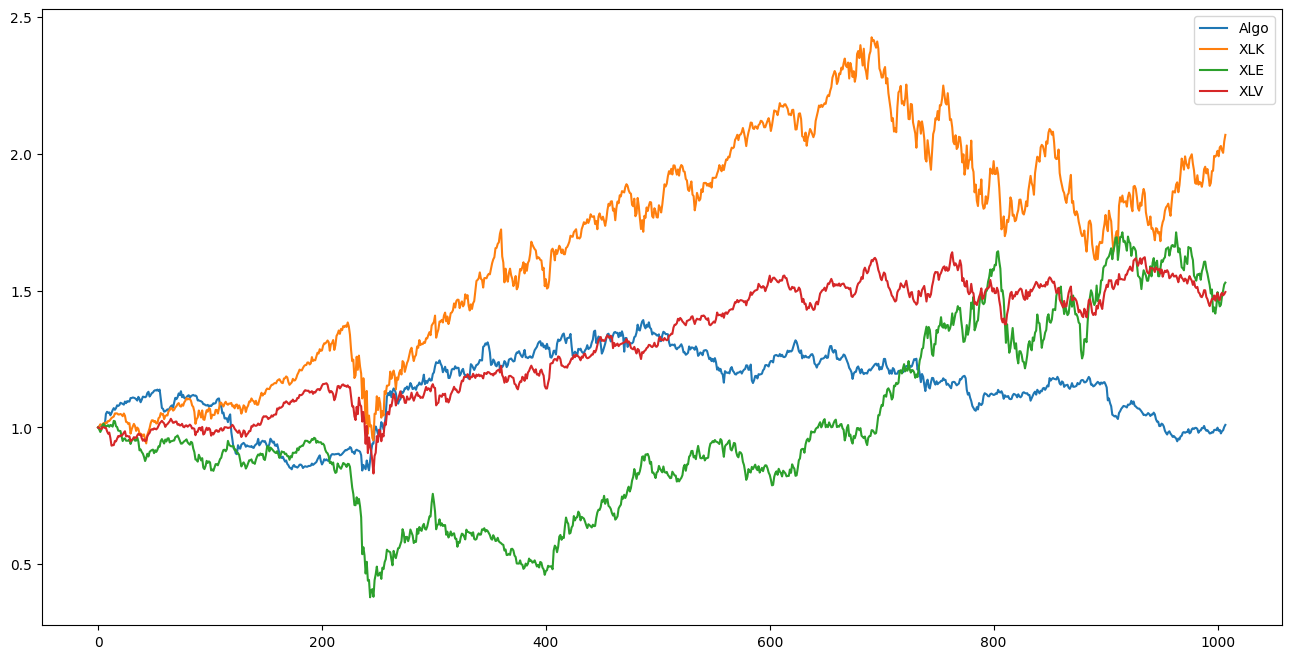

In [237]:
plt.figure(figsize=(16,8))
plt.plot(cumret, label='Algo')
plt.plot(XLK_cumret/XLK_cumret[0],label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0],label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0],label='XLV')
plt.legend()

In [238]:
#take 5bps transaction commission into consideration
# fraction of returns to pay transaction costs for
tc_fraction = abs(positions.shift(1)[1:].diff()).sum(axis=1)/abs(positions.shift(1)[1:]).sum(axis=1)
# assume two-way transaction cost of 0.1%
ret_tc = returns_algo - 0.0005*2*tc_fraction
cumret_tc = np.nancumprod(1+ret_tc)

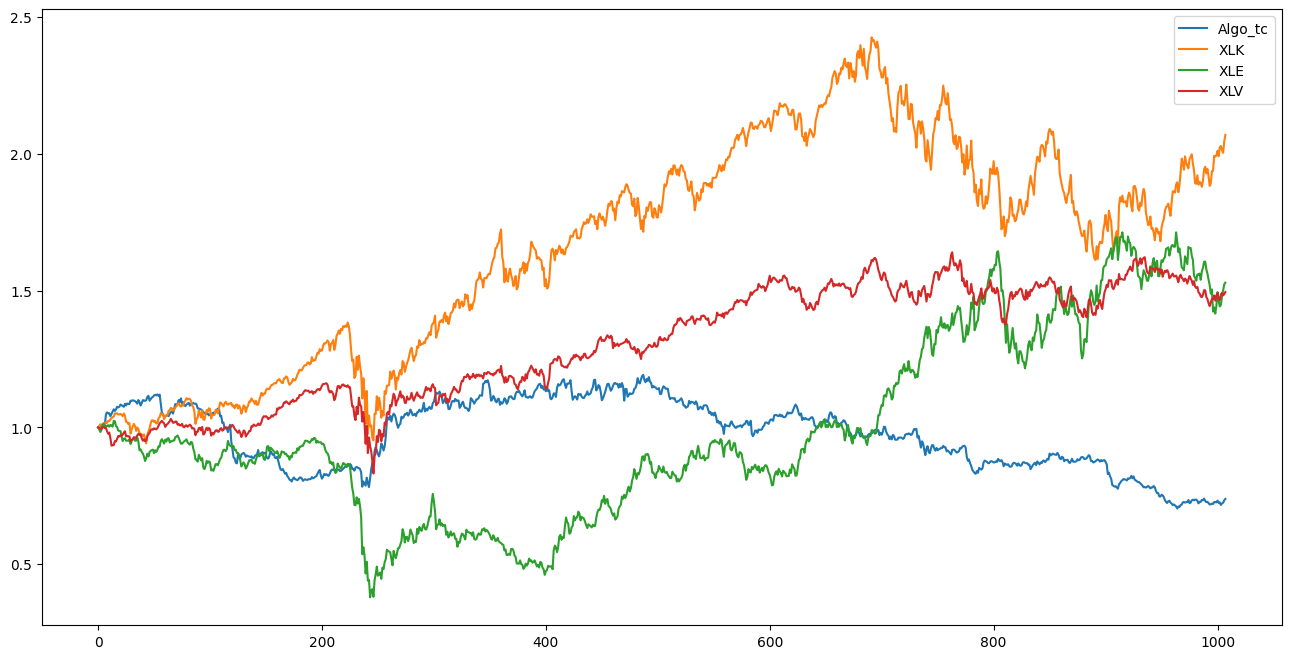

In [239]:
plt.figure(figsize=(16,8))
plt.plot(cumret_tc, label='Algo_tc')
plt.plot(XLK_cumret/XLK_cumret[0],label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0],label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0],label='XLV')
plt.legend()

In [240]:
def calculate_metrics(cumret):
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [241]:
results = pd.DataFrame(index=['XLK', 'XLV', 'XLE','Algo','Algo_tc'], columns=['total_return', 'apr', 'Sharpe', 'maxDD', 'maxDDD'])
results.loc['XLK'] = calculate_metrics(XLK_cumret)
results.loc['XLV'] = calculate_metrics(XLV_cumret)
results.loc['XLE'] = calculate_metrics(XLE_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results.loc['Algo_tc'] = calculate_metrics(cumret_tc)
results

,total_return,apr,Sharpe,maxDD,maxDDD
XLK,1.069859,0.199458,0.770025,-0.335591,316.0
XLV,0.495316,0.105817,0.604823,-0.284043,244.0
XLE,0.52958,0.112098,0.468844,-0.629852,633.0
Algo,0.009449,0.002354,0.102836,-0.318309,520.0
Algo_tc,-0.261215,-0.072894,-0.333025,-0.40978,520.0


## PCA

In [242]:
#calculate the eigenvalue and eigenvectors
#calculate covariance matrix and decompose it into eigenvectors
eigenvalue, eigenvectors = np.linalg.eig(returns[stocks].corr())

In [243]:
eigenvalue

array([12.08021353,  3.62198293,  1.32017937,  1.17256237,  1.03963967,
        0.91759502,  0.86914203,  0.7339445 ,  0.10833474,  0.65303933,
        0.63658015,  0.61007502,  0.58642792,  0.1577884 ,  0.51128027,
        0.50274302,  0.47379909,  0.19389547,  0.21074853,  0.24562033,
        0.25824079,  0.2696815 ,  0.41400104,  0.39797599,  0.28991954,
        0.38010461,  0.36023919,  0.3118093 ,  0.34304369,  0.32939265])

(0.0, 0.5)

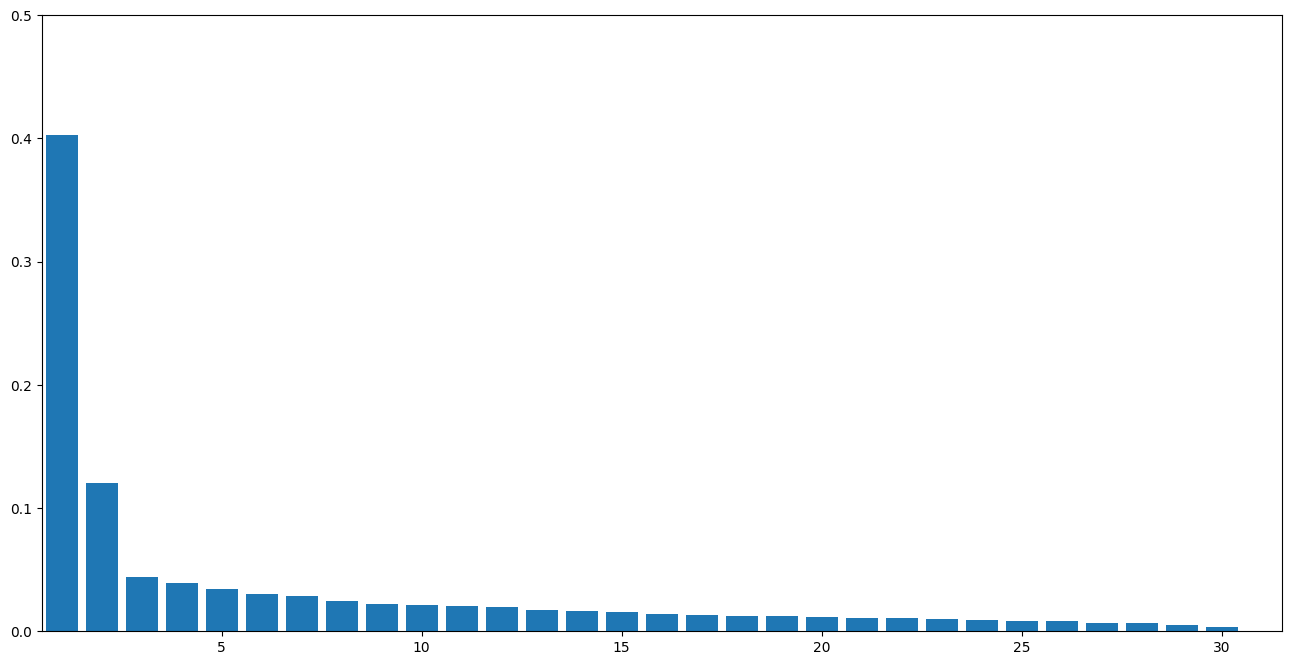

In [244]:
#plot the rank of principle componenets with eigenvalues measured as percentage of explained variance
plt.figure(figsize=(16,8))
plt.bar(np.arange(1,31), height=(np.sort(eigenvalue)[::-1])/eigenvalue.sum())
plt.xlim(0.5,31.5) #we have 30 dimensional features, by PCA we put maximum information on first component..., try to compress information into a smaller dimension matrix
plt.ylim(0,0.5)

In [245]:
#calculate returns of eigenportfolio using formula we mentioned above
weights = eigenvectors[:,0]/returns[stocks].std() 
weights = weights/weights.sum() #weight is Q in original paper
return_eigenportfolio= np.cumprod((weights*returns[stocks]).sum(axis=1)+1)
return_benchmark = np.cumprod(returns[ETFs]+1) 

In [246]:
return_eigenportfolio=pd.DataFrame(return_eigenportfolio)
return_eigenportfolio.columns=['Return']
return_eigenportfolio.head()

,Return
Date,
2019-01-03,0.975969
2019-01-04,1.011581
2019-01-07,1.026942
2019-01-08,1.040233
2019-01-09,1.050349


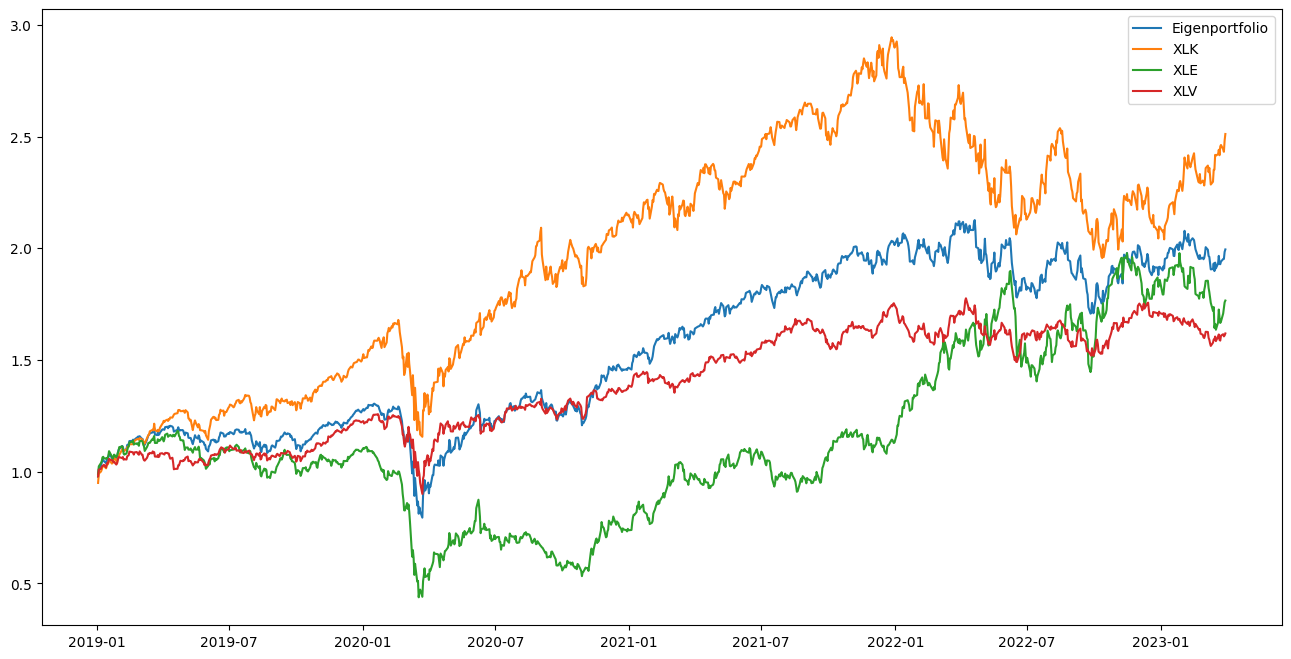

In [247]:
plt.figure(figsize=(16,8))
plt.plot(return_eigenportfolio, label='Eigenportfolio')
plt.plot(return_benchmark, label=['XLK','XLE','XLV'])
plt.legend()

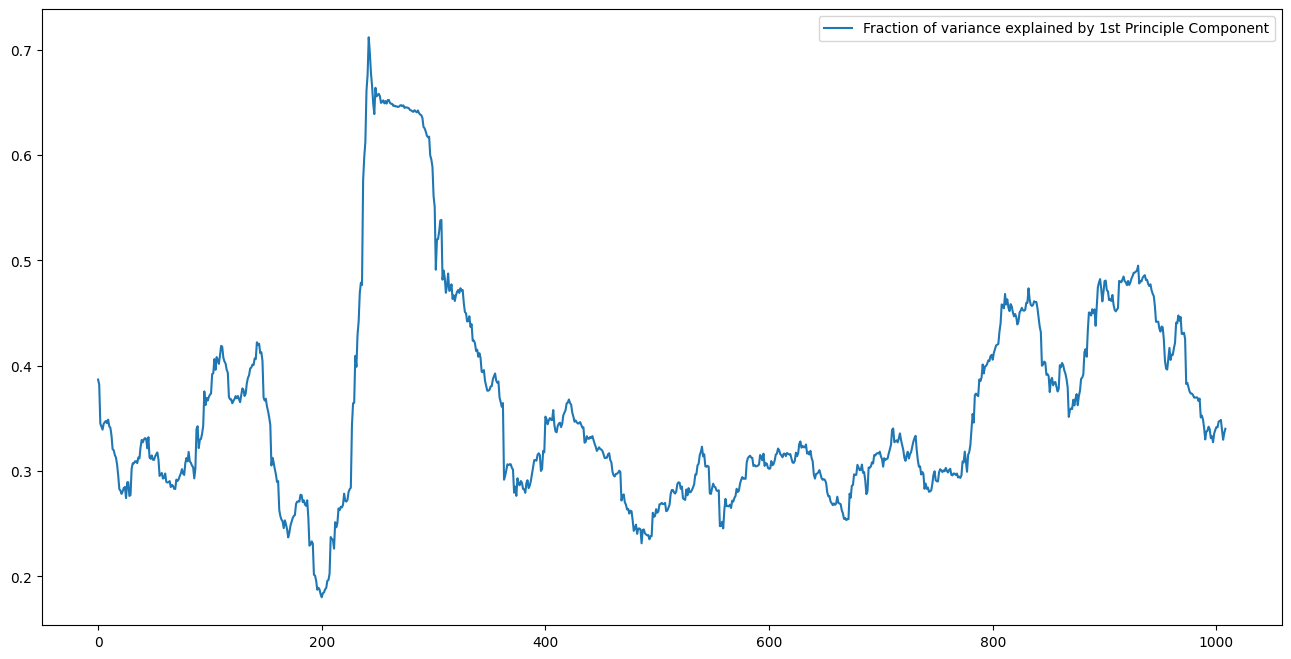

In [248]:
#process of percentage of variance explained by first PC
explained_variance = []

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    eigenvalues = np.linalg.eig(tmp_ret.corr())[0]
    eigenvalues = np.sort(eigenvalues)[::-1] #sort
    explained_variance.append(eigenvalues[0]/eigenvalues.sum()) #store in the dictionary
#plot   
plt.figure(figsize=(16,8))
plt.plot(explained_variance, label='Fraction of variance explained by 1st Principle Component')
plt.legend()

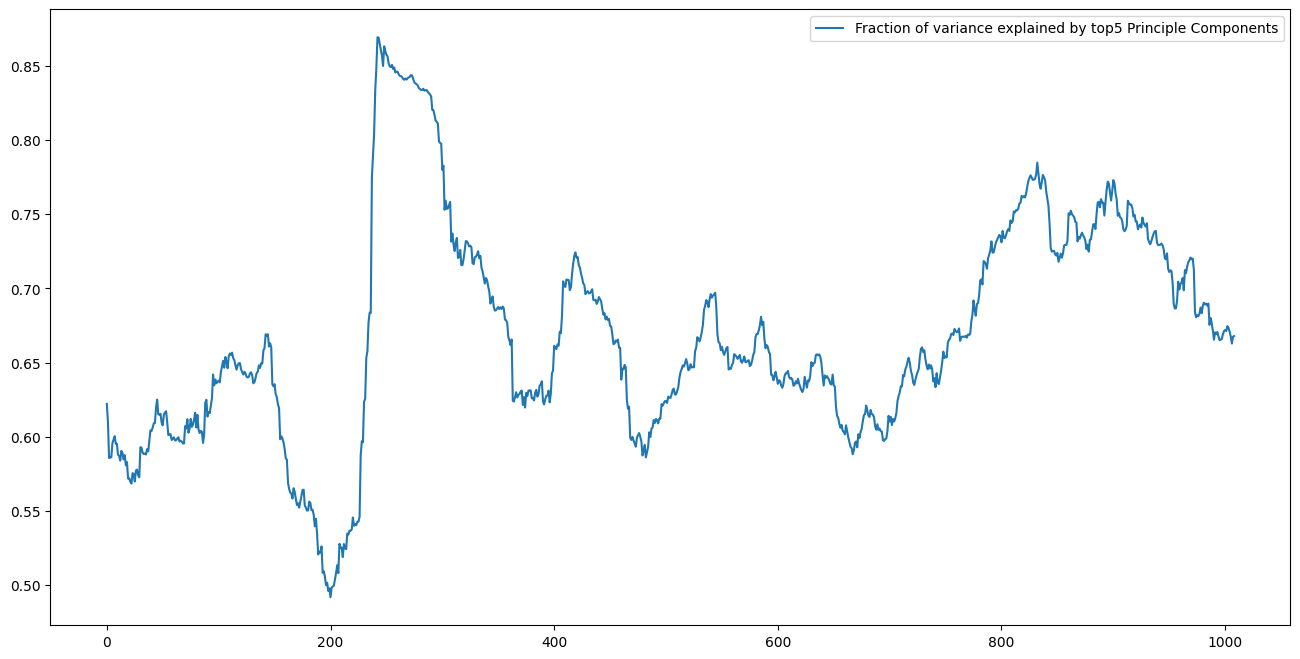

In [249]:
#evolution of percentage of variance explained by top5 principle components
explained_variance = []

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    eigenvalues = np.linalg.eig(tmp_ret.corr())[0]
    eigenvalues = np.sort(eigenvalues)[::-1]
    explained_variance.append(eigenvalues[:5].sum()/eigenvalues.sum())
    
plt.figure(figsize=(16,8))
plt.plot(explained_variance, label='Fraction of variance explained by top5 Principle Components')
plt.legend()

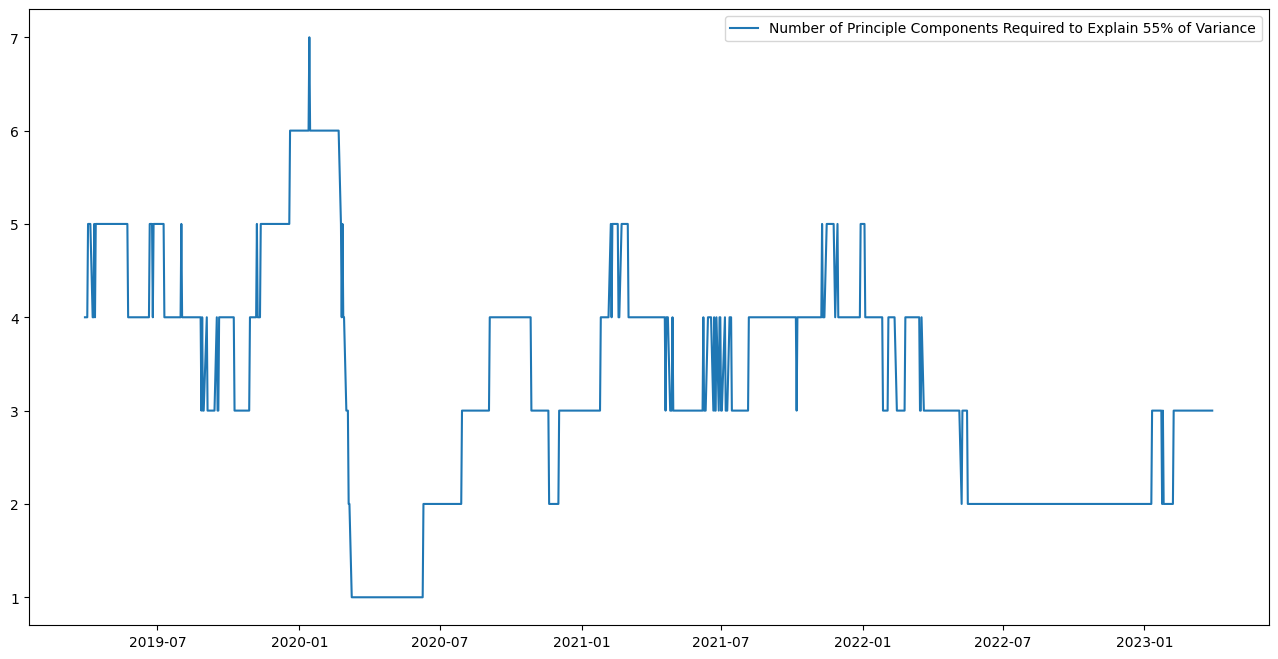

In [250]:
# find number of PCs required to explain 55% of variance
num_components = pd.DataFrame(index=returns.index, columns=['n_comp'])

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    eigenvalues = np.linalg.eig(tmp_ret.corr())[0]
    eigenvalues = np.sort(eigenvalues)[::-1]
    explained_variance = eigenvalues/np.sum(eigenvalues)
    n_components = np.where((np.cumsum(explained_variance))>=0.55)[0][0]+1
    num_components.loc[t] = n_components
    
plt.figure(figsize=(16,8))
plt.plot(num_components, label='Number of Principle Components Required to Explain 55% of Variance')
plt.legend()

In [251]:
#take average on numbers of component required
num_components.mean()

n_comp    3.29336
dtype: float64

In [252]:
#create a list
returns[['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6', 'eig7']] = np.nan

for t in returns.iloc[59:].index:
    tmp_ret = returns[stocks].loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    eigenvalues, eigenvectors = np.linalg.eig(tmp_ret.corr())
    index = np.argsort(eigenvalues)[::-1]
    
    for i in range(1,8):
        weights = eigenvectors[:,index[i-1]] / tmp_ret.std()
        weights /= abs(weights).sum() # make weights sum to one
        returns.loc[t][f'eig{i}'] = (weights*tmp_ret.iloc[-1]).sum()

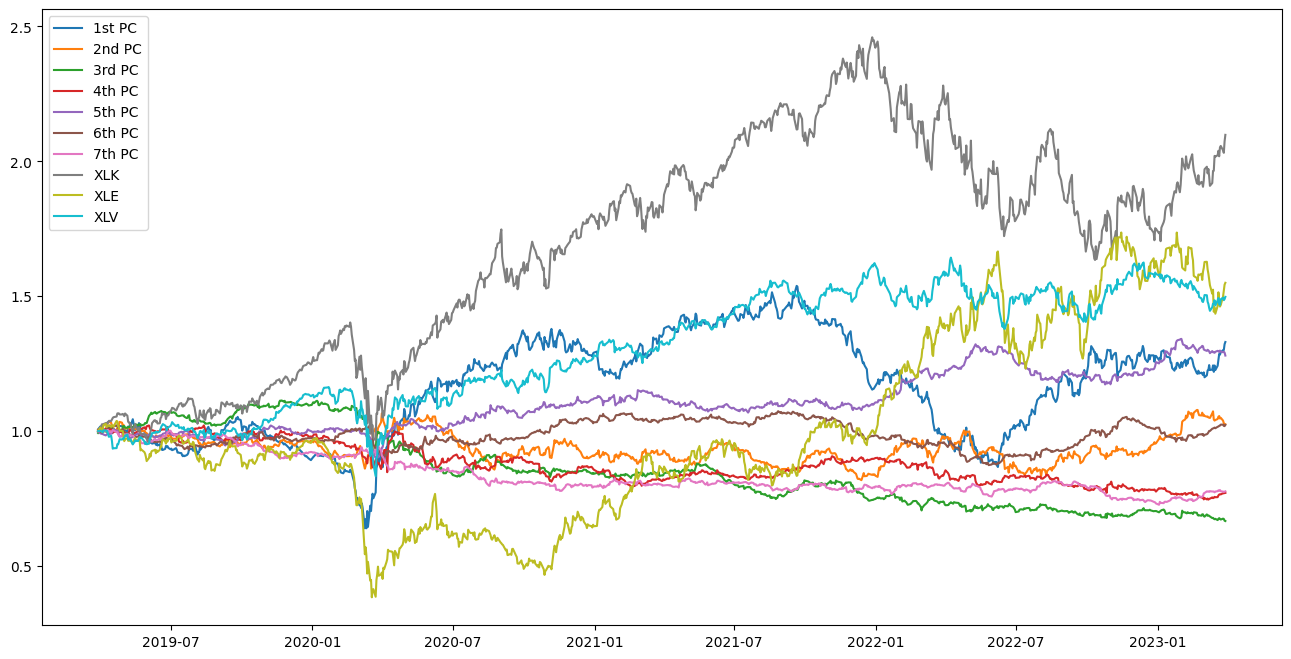

In [253]:
plt.figure(figsize=(16,8))
plt.plot(np.cumprod(returns['eig1']+1), label='1st PC')
plt.plot(np.cumprod(returns['eig2']+1), label='2nd PC')
plt.plot(np.cumprod(returns['eig3']+1), label='3rd PC')
plt.plot(np.cumprod(returns['eig4']+1), label='4th PC')
plt.plot(np.cumprod(returns['eig5']+1), label='5th PC')
plt.plot(np.cumprod(returns['eig6']+1), label='6th PC')
plt.plot(np.cumprod(returns['eig7']+1), label='7th PC')
plt.plot(return_benchmark.iloc[59:]/return_benchmark.iloc[59], label=['XLK','XLE','XLV'])
plt.legend()

In [254]:
returns[['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6', 'eig7']].corr()

,eig1,eig2,eig3,eig4,eig5,eig6,eig7
eig1,1.000000,0.033514,-0.001873,-0.006492,-0.031367,0.062156,-0.006896
eig2,0.033514,1.000000,-0.089786,0.031312,-0.062709,-0.063996,-0.007864
eig3,-0.001873,-0.089786,1.000000,-0.018088,-0.029265,-0.006642,-0.017714
eig4,-0.006492,0.031312,-0.018088,1.000000,0.013952,-0.106704,0.021370
eig5,-0.031367,-0.062709,-0.029265,0.013952,1.000000,0.010957,-0.024181
eig6,0.062156,-0.063996,-0.006642,-0.106704,0.010957,1.000000,-0.114773
eig7,-0.006896,-0.007864,-0.017714,0.021370,-0.024181,-0.114773,1.000000


### 1 PCA Portfolio

In [255]:
S_Scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
Betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6', 'eig7']
numPC = 1

for t in returns.index[118:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    OU = pd.DataFrame(index=stocks, columns=['interception','coefficient','Var(zeta)','kappa','m','sigma','sigma_equilibrum'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:numPC]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        Betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        interception = model2.intercept_
        coefficient = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(coefficient)*252
        m = interception/(1-coefficient)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-coefficient**2))
        sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            OU.loc[stock] = [x.item() for x in [interception, coefficient, np.var(zeta), kappa, m, sigma, sigma_equilibrum]]

    OU.dropna(axis=0, inplace=True)

    # calculate s-score
    OU['m_bar'] = (OU['interception']/(1 - OU['coefficient']) - OU['interception'].mean()/(1-OU['coefficient'].mean()))
    OU['s'] = -OU['m_bar'] / OU['sigma_equilibrum']
    S_Scores.loc[t] = OU['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=S_Scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=S_Scores.index, columns=[s])
    pos = 0
    for t in  S_Scores.index:
        score =  S_Scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 
            pos = 0
        else:
            positions.loc[t][s] = pos 

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    p = algo_pos.loc[t]
    p[p>0] /= sum(p>0) 
    p[p<0] /= sum(p<0) 
    algo_weights.loc[t] = p
    
# calculate positions in PCA portfolios
algo_weights[pcs[:numPC]] = (-np.stack((Betas.iloc[1:,:]*algo_weights).sum(axis=1).values)).reshape(-1,1)

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift(1)[1:]).sum(axis=1) / (abs(algo_weights.shift(1)[1:]).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

<ipython-input-255-196066948315>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-255-196066948315>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))


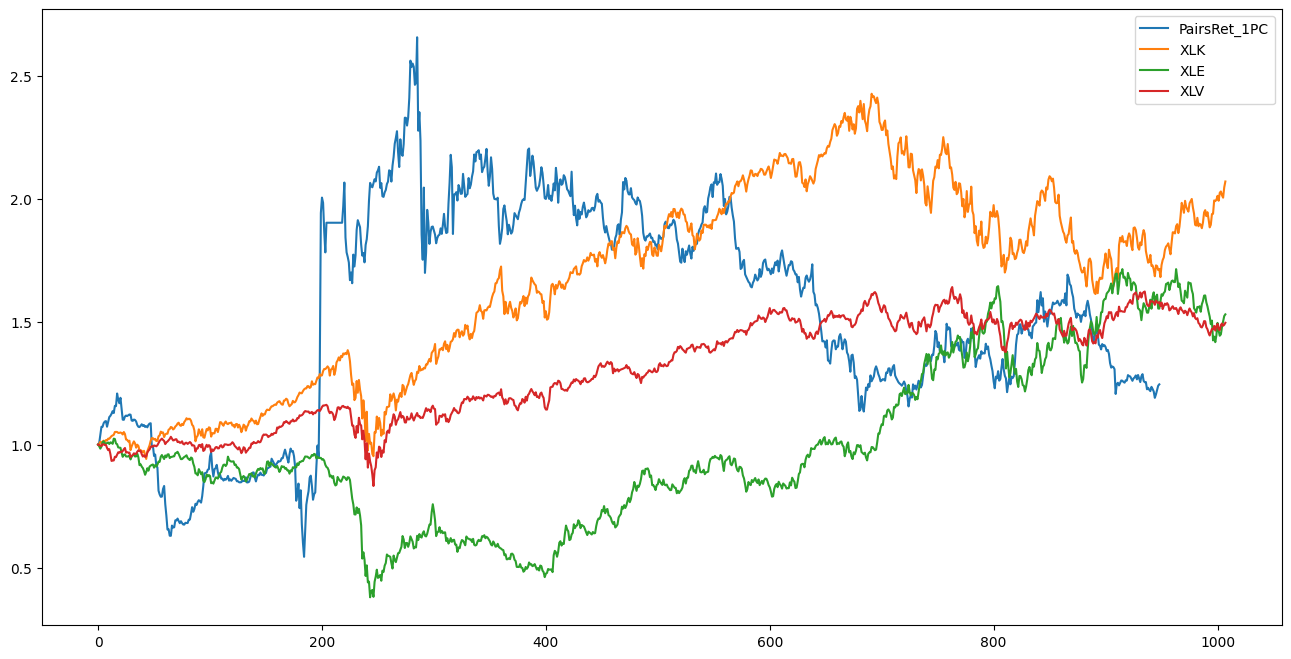

In [256]:
plt.figure(figsize=(16,8))
plt.plot(cumret, label='PairsRet_1PC')
plt.plot(XLK_cumret/XLK_cumret[0], label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0], label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0], label='XLV')
plt.legend()

In [257]:
results = pd.DataFrame(index=['XLK', 'XLE', 'XLV','PairsRet_1PC'], columns=['total_return', 'apr', 'Sharpe', 'maxDD', 'maxDDD'])
results.loc['XLK'] = calculate_metrics(XLK_cumret)
results.loc['XLE'] = calculate_metrics(XLE_cumret)
results.loc['XLV'] = calculate_metrics(XLV_cumret)
results.loc['PairsRet_1PC'] = calculate_metrics(cumret)
results

,total_return,apr,Sharpe,maxDD,maxDDD
XLK,1.069859,0.199458,0.770025,-0.335591,316.0
XLE,0.52958,0.112098,0.468844,-0.629852,633.0
XLV,0.495316,0.105817,0.604823,-0.284043,244.0
PairsRet_1PC,0.244901,0.059894,0.366226,-0.573001,663.0


### 3 PCA Portfolios--Mean

In [258]:
S_Scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
Betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6', 'eig7']
numPC = 3

for t in returns.index[118:]:
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    OU = pd.DataFrame(index=stocks, columns=['interception','coefficient','Var(zeta)','kappa','m','sigma','sigma_equilibrum'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:numPC]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        Betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        interception = model2.intercept_
        coefficient = model2.coef_
        zeta = y - model2.predict(X)
        
        kappa = -np.log(coefficient)*252
        m = interception/(1-coefficient)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-coefficient**2))
        sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            OU.loc[stock] = [x.item() for x in [interception, coefficient, np.var(zeta), kappa, m, sigma, sigma_equilibrum]]

    OU.dropna(axis=0, inplace=True)

    # calculate s-score
    OU['m_bar'] = (OU['interception']/(1 - OU['coefficient']) - OU['interception'].mean()/(1-OU['coefficient'].mean()))
    OU['s'] = -OU['m_bar'] / OU['sigma_equilibrum']
    S_Scores.loc[t] = OU['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=S_Scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=S_Scores.index, columns=[s])
    pos = 0
    for t in  S_Scores.index:
        score =  S_Scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 
            pos = 0
        else:
            positions.loc[t][s] = pos 

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long/short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    p = algo_pos.loc[t]
    p[p>0] /= sum(p>0) 
    p[p<0] /= sum(p<0) 
    algo_weights.loc[t] = p
    
# calculate positions in PCA portfolios
algo_weights[pcs[:numPC]] = (-np.stack((Betas.iloc[1:,:]*algo_weights).sum(axis=1).values))

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift(1)[1:]).sum(axis=1) / (abs(algo_weights.shift(1)[1:]).sum(axis=1)/2)
cumret4 = np.nancumprod(ret+1)

<ipython-input-258-8f2939f47e3e>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-258-8f2939f47e3e>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-258-8f2939f47e3e>:32: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))


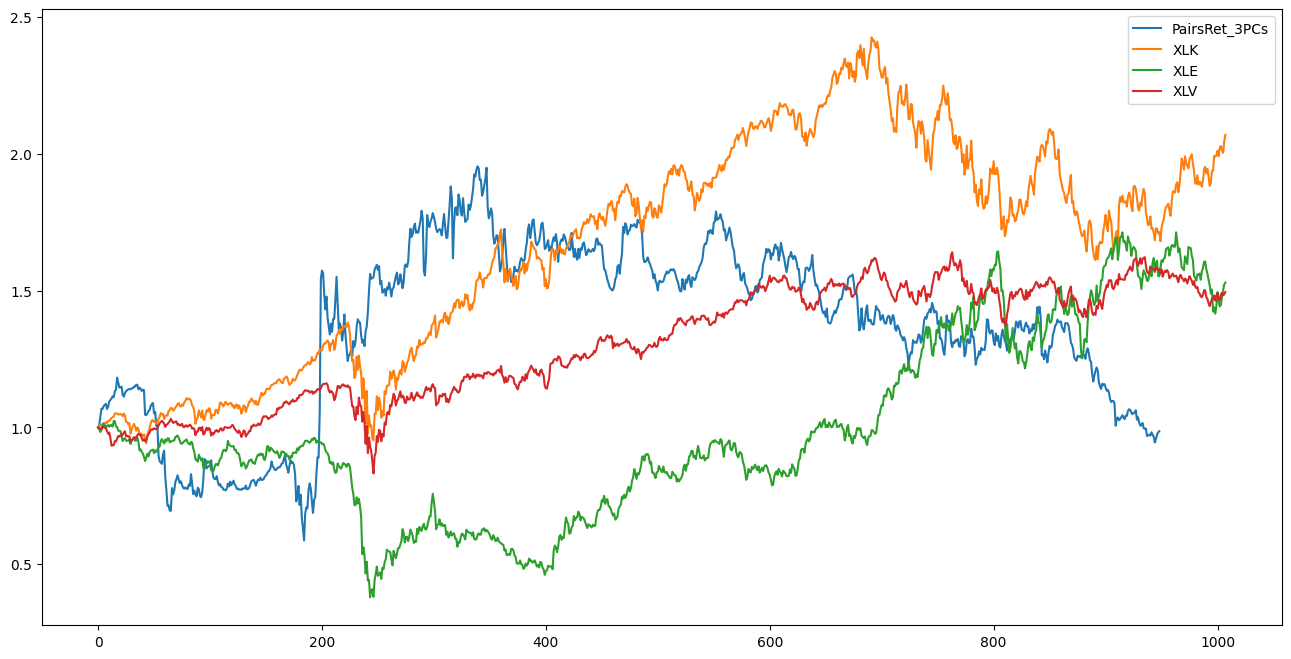

In [259]:
plt.figure(figsize=(16,8))
plt.plot(cumret4, label='PairsRet_3PCs')
plt.plot(XLK_cumret/XLK_cumret[0], label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0], label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0], label='XLV')
plt.legend()

In [260]:
results = pd.DataFrame(index=['XLK', 'XLE', 'XLV','PairsRet_3PCs'], columns=['total_return', 'apr', 'Sharpe', 'maxDD', 'maxDDD'])
results.loc['XLK'] = calculate_metrics(XLK_cumret)
results.loc['XLE'] = calculate_metrics(XLE_cumret)
results.loc['XLV'] = calculate_metrics(XLV_cumret)
results.loc['PairsRet_3PCs'] = calculate_metrics(cumret4)
results

,total_return,apr,Sharpe,maxDD,maxDDD
XLK,1.069859,0.199458,0.770025,-0.335591,316.0
XLE,0.52958,0.112098,0.468844,-0.629852,633.0
XLV,0.495316,0.105817,0.604823,-0.284043,244.0
PairsRet_3PCs,-0.013592,-0.003627,0.206914,-0.516408,609.0


### 7 PCA Portfolios

In [261]:
S_Scores = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)
Betas = pd.DataFrame(index=returns.iloc[118:].index, columns=stocks)

pcs = ['eig1', 'eig2', 'eig3', 'eig4', 'eig5', 'eig6', 'eig7']
numPC = 7

for t in returns.index[118:]:
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    OU = pd.DataFrame(index=stocks, columns=['interception','coefficient','Var(zeta)','kappa','m','sigma','sigma_equilibrum'])
    
    for stock in stocks:
        X = tmp_ret[pcs[:numPC]].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        Betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        interception = model2.intercept_
        coefficient = model2.coef_
        zeta = y - model2.predict(X)
        
        kappa = -np.log(coefficient)*252
        m = interception/(1-coefficient)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-coefficient**2))
        sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            OU.loc[stock] = [x.item() for x in [interception, coefficient, np.var(zeta), kappa, m, sigma, sigma_equilibrum]]

    OU.dropna(axis=0, inplace=True)

    # calculate s-score
    OU['m_bar'] = (OU['interception']/(1 - OU['coefficient']) - OU['interception'].mean()/(1-OU['coefficient'].mean()))
    OU['s'] = -OU['m_bar'] / OU['sigma_equilibrum']
    S_Scores.loc[t] = OU['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=S_Scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=S_Scores.index, columns=[s])
    pos = 0
    for t in  S_Scores.index:
        score =  S_Scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 
            pos = 0
        else:
            positions.loc[t][s] = pos 

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long/short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) 
    tmp[tmp<0] /= sum(tmp<0) 
    algo_weights.loc[t] = tmp
    
# calculate positions in PCA portfolios
algo_weights[pcs[:numPC]] = (-np.stack((Betas.iloc[1:,:]*algo_weights).sum(axis=1).values))

# calculate returns
ret = (returns.iloc[119:] * algo_weights.shift(1)[1:]).sum(axis=1) / (abs(algo_weights.shift(1)[1:]).sum(axis=1)/2)
cumret1 = np.nancumprod(ret+1)

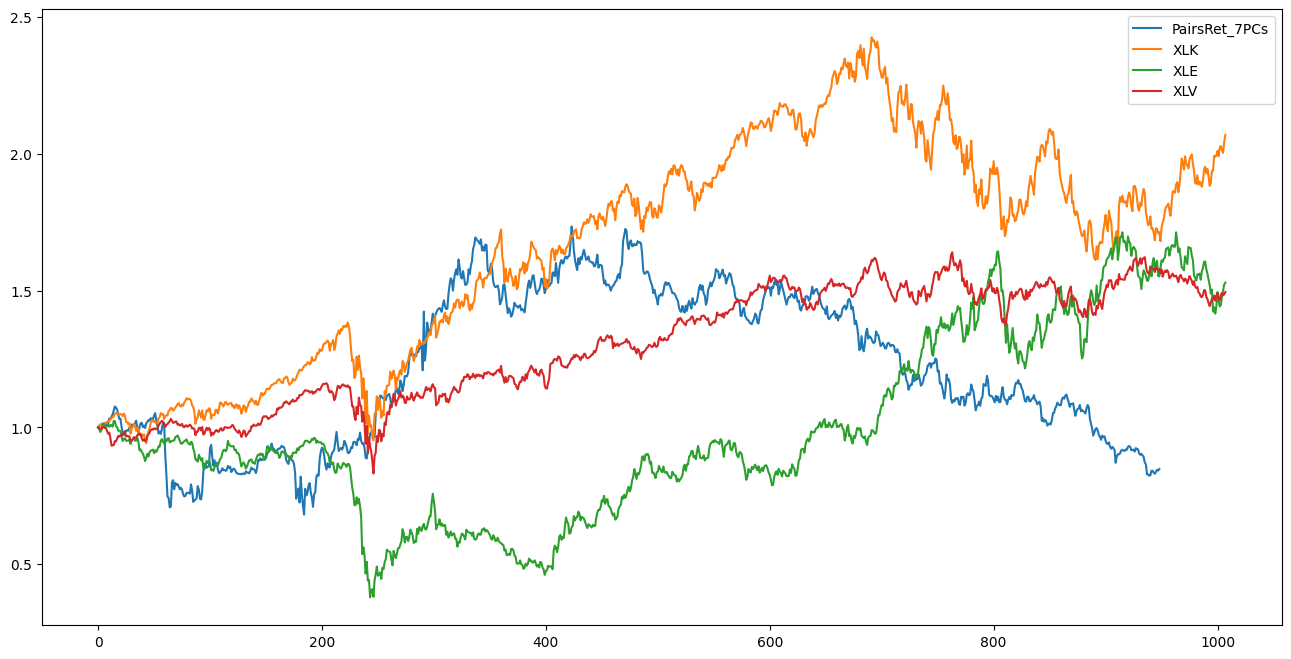

In [262]:
plt.figure(figsize=(16,8))
plt.plot(cumret1, label='PairsRet_7PCs')
plt.plot(XLK_cumret/XLK_cumret[0], label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0], label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0], label='XLV')
plt.legend()

In [263]:
results = pd.DataFrame(index=['XLK', 'XLE', 'XLV','PairsRet_7PCs'], columns=['total_return', 'apr', 'Sharpe', 'maxDD', 'maxDDD'])
results.loc['XLK'] = calculate_metrics(XLK_cumret)
results.loc['XLE'] = calculate_metrics(XLE_cumret)
results.loc['XLV'] = calculate_metrics(XLV_cumret)
results.loc['PairsRet_7PCs'] = calculate_metrics(cumret1)
results

,total_return,apr,Sharpe,maxDD,maxDDD
XLK,1.069859,0.199458,0.770025,-0.335591,316.0
XLE,0.52958,0.112098,0.468844,-0.629852,633.0
XLV,0.495316,0.105817,0.604823,-0.284043,244.0
PairsRet_7PCs,-0.151745,-0.04276,0.040563,-0.525038,525.0


### Take Volume into Account 

In [264]:
VolStock=yf.download(stocks,startdate,enddate,progress=False)['Volume']
VolETF=yf.download(ETFs,startdate,enddate,progress=False)['Volume']

In [265]:
Volume=pd.concat([VolStock,VolETF],ignore_index=False,axis=1)
Volume

,AAPL,ABT,ALGN,ALNY,AMZN,APA,ARGX,BKR,BMRN,BP,...,GOOG,HPQ,ISRG,LINK,META,MMM,T,XLE,XLK,XLV
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,148158800,8737200,1126800,773400,159662000,4629400,292100,7150000.0,624800,5537100,...,30652000,9467400,2396100,0,28146200,2475200,52025256,24892600,15442900,14179900
2019-01-03,365248800,10570700,2414200,645400,139512000,5351400,275900,6672900.0,1004600,7137300,...,36822000,13459000,2799300,100,22717900,3358200,49787166,18024100,24946700,17668000
2019-01-04,234428400,8299100,2518200,855800,183652000,4215700,269700,5040400.0,1382600,9336700,...,41878000,9220400,2759700,4300,29002100,2995100,55703858,21351500,20767800,16262600
2019-01-07,219111200,9503000,1311200,1156900,159864000,3924400,224200,4740000.0,1435100,6114300,...,39638000,8167600,2177400,600,20089300,2162200,54377872,18056700,11908600,12387200
2019-01-08,164101200,8905100,1001500,995900,177628000,4131000,303100,4959100.0,1086300,5654900,...,35298000,6355900,2241600,0,26263800,2479800,57683105,18692300,13002600,13371000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,59196500,5269100,994100,351500,56095400,6961400,146100,7614500.0,772200,11142200,...,25236200,5796400,3269600,5600,27716400,3552900,32058000,20649000,5936300,8163700
2023-03-27,52390300,4627700,700300,938400,46721300,7023400,183900,7690500.0,1078400,9415300,...,25393400,4041700,1682700,0,18527200,2797400,26650500,20111900,5405300,9455400
2023-03-28,45992200,4815400,616700,1304900,38720100,4842000,221700,9917300.0,859900,8476900,...,24913500,4300700,1179500,400,19127300,2462800,21547200,16298400,4984000,8037400


In [266]:
returns = prices.pct_change().dropna()

In [267]:
modified_returns = ((Volume.rolling(60).mean()/Volume).loc[returns.index] * returns).dropna()
modified_returns.head()

,AAPL,ABT,ALGN,ALNY,AMZN,APA,ARGX,BKR,BMRN,BP,...,GOOG,HPQ,ISRG,LINK,META,MMM,T,XLE,XLK,XLV
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0.007520,-0.004473,0.004402,-0.020241,0.022524,0.011751,0.024687,0.004332,0.007034,0.009482,...,0.021350,0.027594,0.010363,0.468181,0.022790,0.017293,0.015844,0.014482,0.014217,0.001616
2019-04-05,0.010450,0.008304,0.028480,0.015510,0.013319,0.051973,0.051143,0.000427,0.019542,0.010792,...,-0.010184,0.002956,0.014013,0.096431,-0.003430,0.002758,0.009014,0.013489,0.009125,0.010161
2019-04-08,0.017484,-0.006867,-0.020322,-0.022103,0.008652,-0.000363,-0.035576,0.001393,-0.026322,0.012184,...,-0.004526,0.012775,0.005933,0.241604,-0.011805,-0.003457,0.001036,0.005477,0.006684,-0.000334
2019-04-10,0.007433,0.003968,0.028977,0.027625,0.009872,0.032907,0.005692,0.010652,0.017520,0.001455,...,0.007936,0.018770,0.014421,-1.321428,0.002209,0.001120,0.006245,0.005179,0.010467,0.000551
2019-04-16,0.000110,-0.013329,-0.025710,0.000567,0.014582,0.015627,-0.043824,-0.004316,-0.030062,-0.007286,...,0.007865,0.021056,-0.019143,2.687717,-0.007105,0.006624,0.010133,0.010442,0.006719,-0.012689


In [268]:
S_Scores = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)
Betas = pd.DataFrame(index=modified_returns.iloc[59:].index, columns=stocks)

for t in returns.index[59:]:
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    OU = pd.DataFrame(index=stocks, columns=['interception','coefficient','Var(zeta)','kappa','m','sigma','sigma_equilibrum'])
    
    for stock in stocks:
        X = tmp_ret[ETFs].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        Betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        interception = model2.intercept_
        coefficient = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(coefficient)*252
        m = interception/(1-coefficient)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-coefficient**2))
        sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            OU.loc[stock] = [x.item() for x in [interception, coefficient, np.var(zeta), kappa, m, sigma, sigma_equilibrum]]

    OU.dropna(axis=0, inplace=True)

    # calculate s-score
    OU['m_bar'] = (OU['interception']/(1 - OU['coefficient']) - OU['interception'].mean()/(1-OU['coefficient'].mean()))
    OU['s'] = -OU['m_bar'] / OU['sigma_equilibrum']
    S_Scores.loc[t] = OU['s']
    
# calculate positions
algo_pos = pd.DataFrame(index=S_Scores.index[1:], columns=stocks)

for s in stocks:
    positions = pd.DataFrame(index=S_Scores.index, columns=[s])
    pos = 0
    for t in  S_Scores.index:
        score =  S_Scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 
            pos = 0
        else:
            positions.loc[t][s]=pos 

    algo_pos[s] = positions
    
# calculate weights (allocate equal amount of capital to long/short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=stocks)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) 
    tmp[tmp<0] /= sum(tmp<0) 
    algo_weights.loc[t] = tmp
    
algo_weights[ETFs] = (-np.stack((Betas.iloc[1:,:]*algo_weights).sum(axis=1).values))

# calculate returns
ret = (returns.iloc[59:] * algo_weights.shift(1)[1:]).sum(axis=1) / (abs(algo_weights.shift(1)[1:]).sum(axis=1)/2)
cumret2 = np.nancumprod(ret+1)

<ipython-input-268-3f6971e776c7>:31: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-268-3f6971e776c7>:31: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))
<ipython-input-268-3f6971e776c7>:31: RuntimeWarning: invalid value encountered in sqrt
  sigma_equilibrum = np.sqrt(np.var(zeta)/(1-coefficient**2))


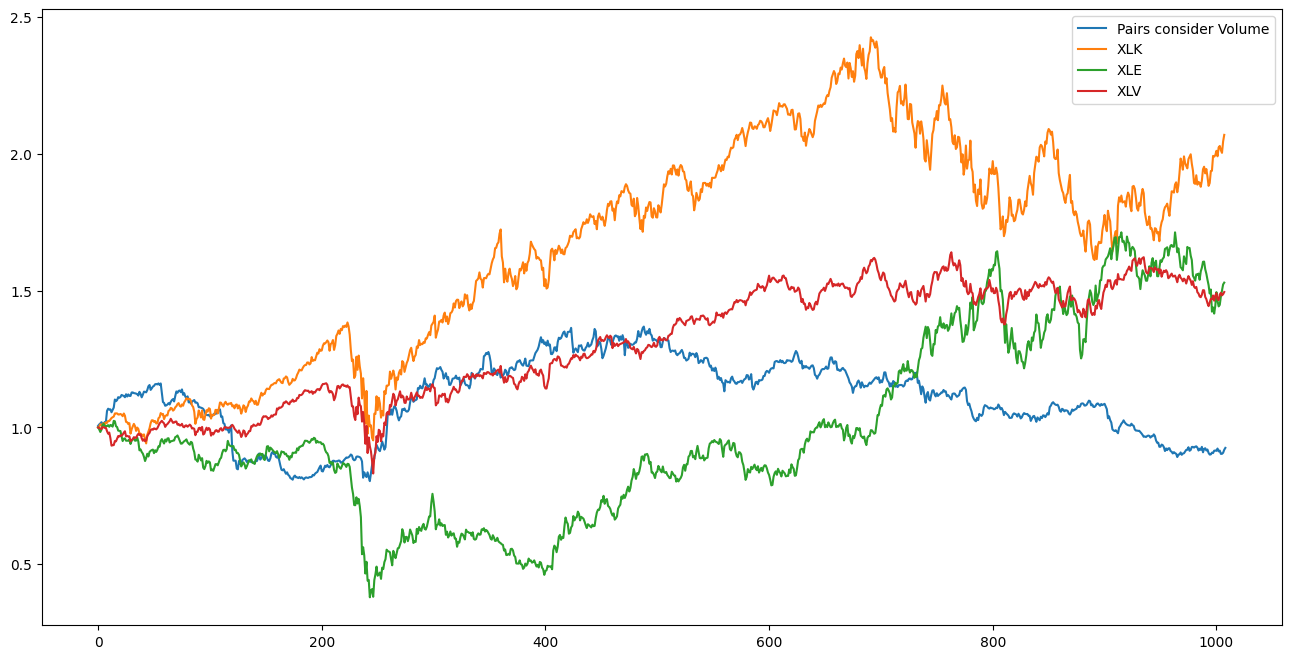

In [269]:
plt.figure(figsize=(16,8))
plt.plot(cumret2, label='Pairs consider Volume')
plt.plot(XLK_cumret/XLK_cumret[0], label='XLK')
plt.plot(XLE_cumret/XLE_cumret[0], label='XLE')
plt.plot(XLV_cumret/XLV_cumret[0], label='XLV')
plt.legend()

In [271]:
results = pd.DataFrame(index=['XLK', 'XLE', 'XLV','Pairs with Volume'], columns=['total_return', 'apr', 'Sharpe', 'maxDD', 'maxDDD'])
results.loc['XLK'] = calculate_metrics(XLK_cumret)
results.loc['XLE'] = calculate_metrics(XLE_cumret)
results.loc['XLV'] = calculate_metrics(XLV_cumret)
results.loc['Pairs with Volume'] = calculate_metrics(cumret2)
results

,total_return,apr,Sharpe,maxDD,maxDDD
XLK,1.069859,0.199458,0.770025,-0.335591,316.0
XLE,0.52958,0.112098,0.468844,-0.629852,633.0
XLV,0.495316,0.105817,0.604823,-0.284043,244.0
Pairs with Volume,-0.079927,-0.02059,-0.021536,-0.34842,520.0


## **Notes:**
### Further Improvement
- the samples are not enough, we should include more stocks from corresponding industries.
- Using more PCA is more suitable for samples whose stocks come from diverse industries. That is, we should add more stocks from additional industries.
- we should try different window size for 30,60,90,120 for find the approparate **trading window size**. 
- we should take leverage into account, correspondingly the borrow cost and borrow rate should be considered as well.
- Constrains should be added with a target function which overlooks volatility of earnings, sign of positions, and self-investment by optimizer during trading process.
  - elements need to consider for optimization
    - the expected returns per unit of time
- If we change the threshold of S-Score calculation in OU process, the trading results will be different.
- **Transcation cost selection** can be obtained by *conventional optimal rule* or *new optimal rule*.
